In [1]:
from SkyTools import healpixhelper as myhp
import healpy as hp

If downgrading resolution of healpix mask, probably want to be conservative and only pass pixels which are 100% covered in the higher-resolution mask

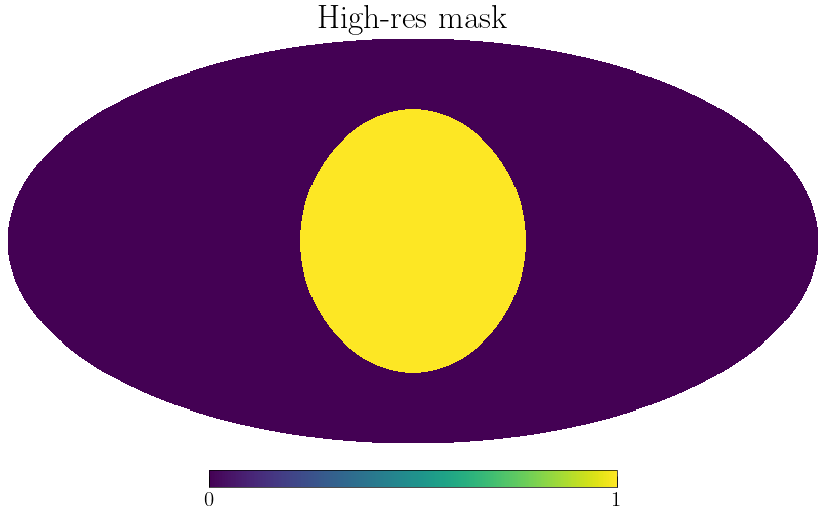

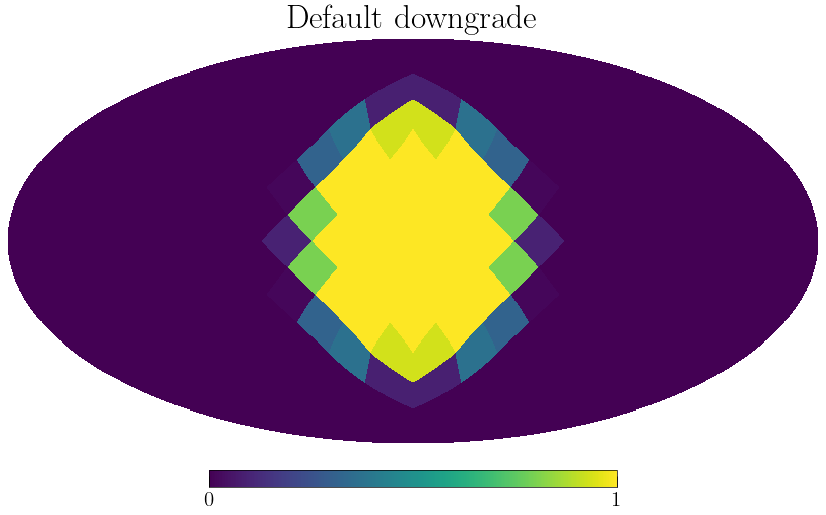

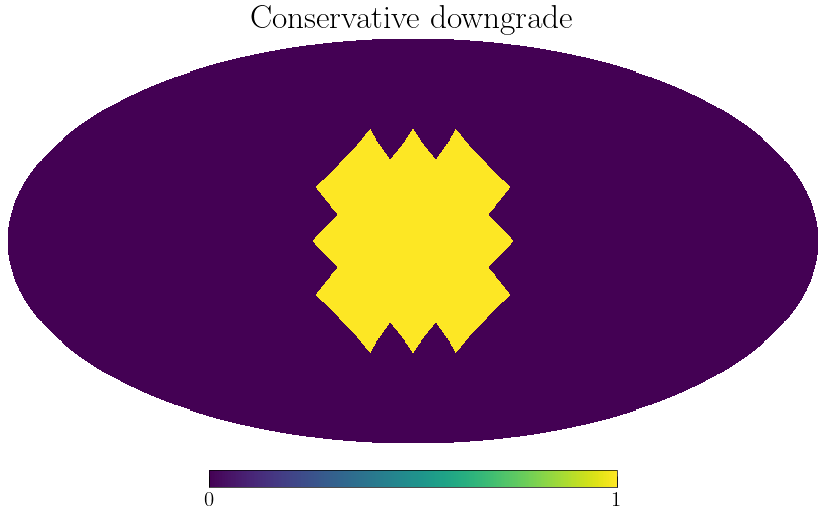

In [2]:
mask = myhp.filled_map(2048)
mask[myhp.query_disc_coord(2048, (0, 0), 50)] = 1
hp.mollview(mask, title='High-res mask')
hp.mollview(hp.ud_grade(mask, 4), title='Default downgrade')
hp.mollview(myhp.proper_ud_grade_mask(mask, 4), title='Conservative downgrade')

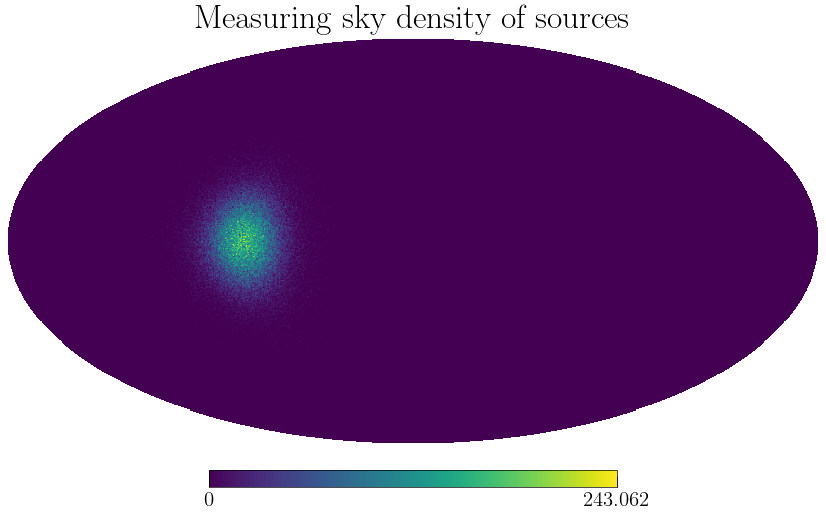

In [4]:
ra, dec = np.random.normal(75, 10, 100000), np.random.normal(0, 10, 100000)
hp.mollview(myhp.healpix_density_map((ra, dec), nsides=128, deg2=True), title='Measuring sky density of sources')

In [6]:
from SkyTools import reddening

/home/graysonpetter/ssd/Dartmouth/common_tools/SkyTools/SkyTools/healpixhelper.py:96: RuntimeWarning: invalid value encountered in divide
  avg_map = np.bincount(pix_of_sources, weights=values, minlength=npix) / np.bincount(pix_of_sources, minlength=npix)


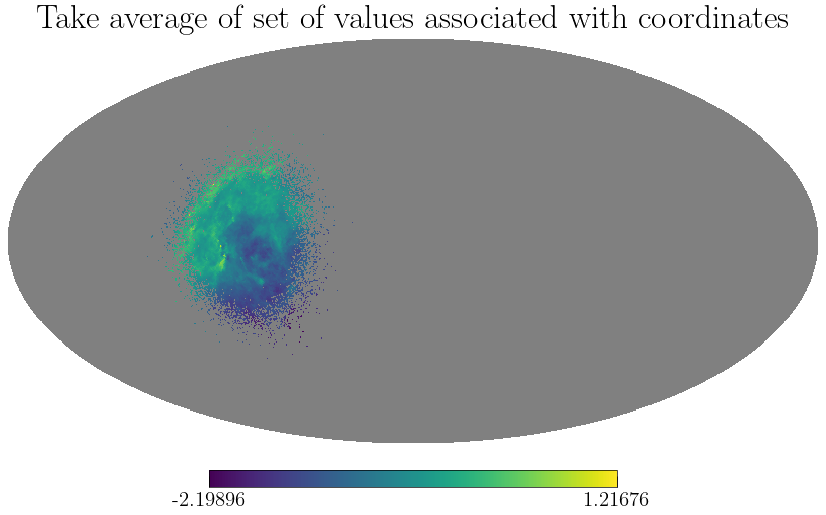

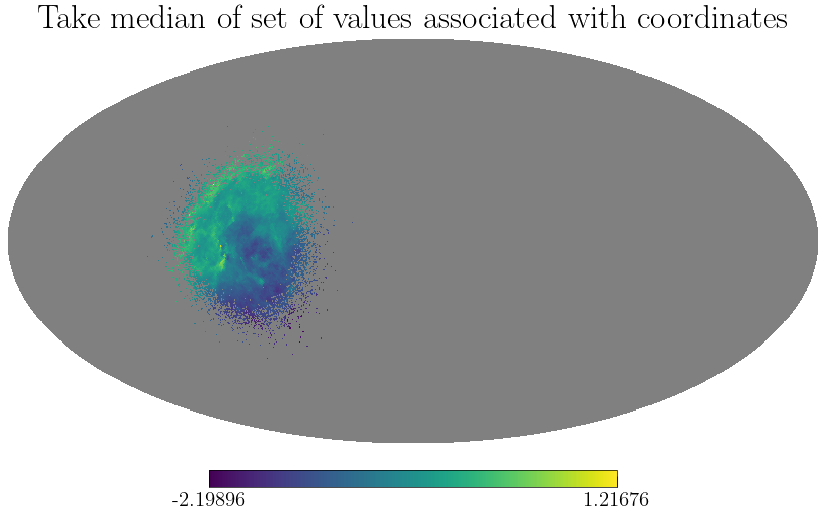

In [8]:
# Get Galactic reddening at set of coordinates
ebv = np.log10(reddening.ebv_at_coords((ra, dec)))
hp.mollview(myhp.healpix_average_in_pixels((ra, dec), nsides=128, values=ebv), title='Take average of set of values associated with coordinates')
hp.mollview(myhp.healpix_median_in_pixels((ra, dec), nsides=128, values=ebv), title='Take median of set of values associated with coordinates')

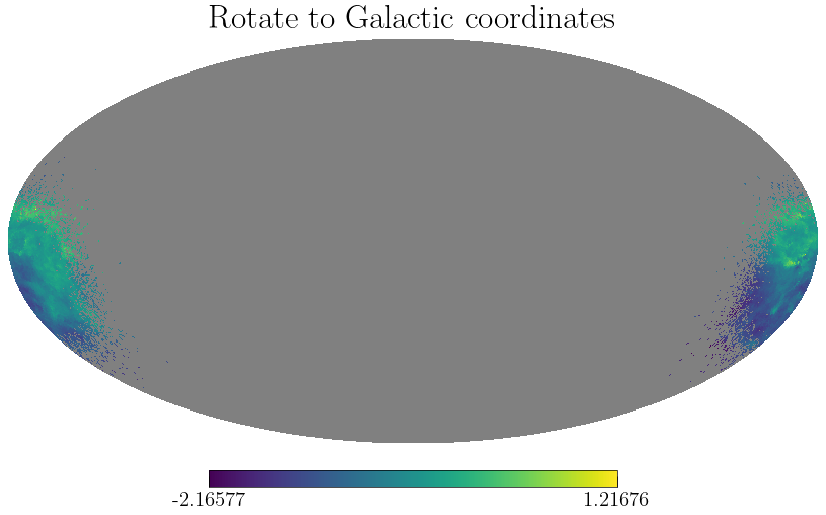

In [10]:
hp.mollview(myhp.change_coord(myhp.healpix_median_in_pixels((ra, dec), nsides=128, values=ebv), ['E', 'G']), title='Rotate to Galactic coordinates')

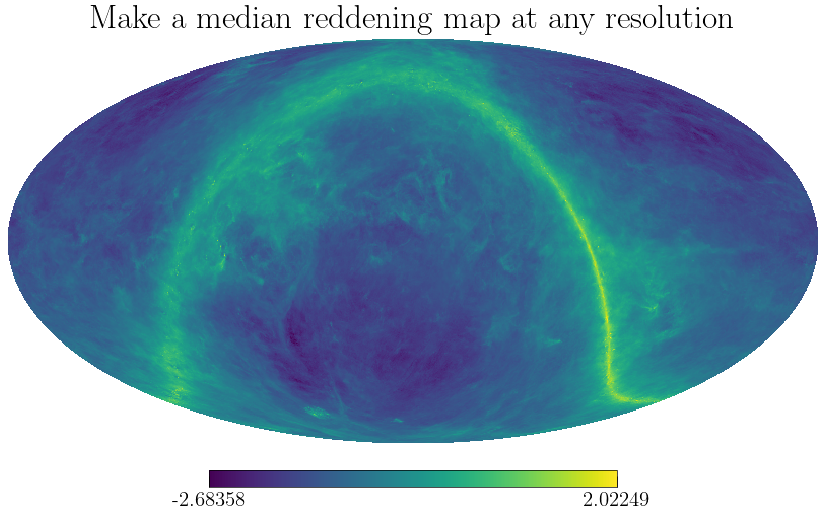

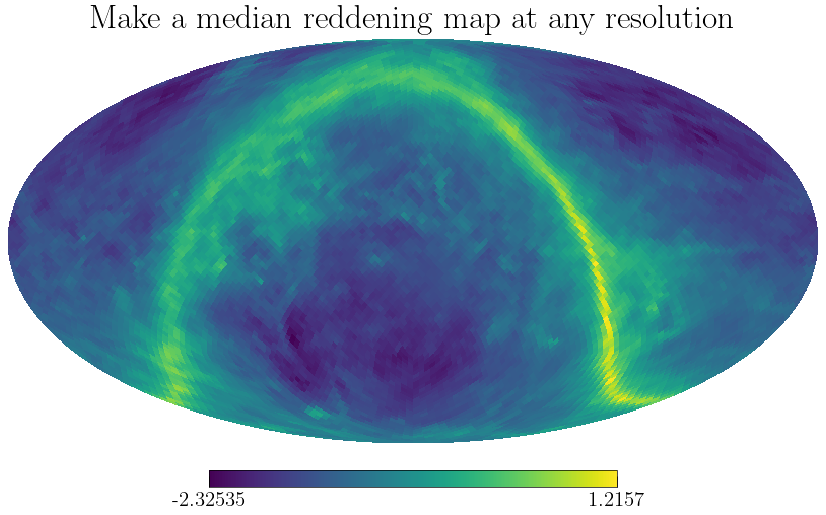

In [11]:
hp.mollview(np.log10(reddening.get_healpix_ebv(512)), title='Make a median reddening map at any resolution')
hp.mollview(np.log10(reddening.get_healpix_ebv(32)), title='Make a median reddening map at any resolution')

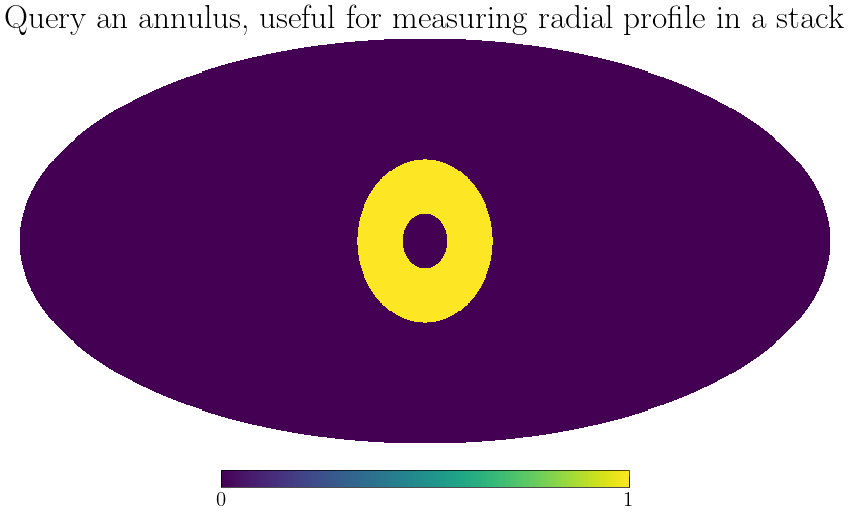

In [12]:
mask = myhp.filled_map(2048)
mask[myhp.query_annulus_coord(2048, (0, 0), 10, 30)] = 1
hp.mollview(mask, title='Query an annulus, useful for measuring radial profile in a stack')

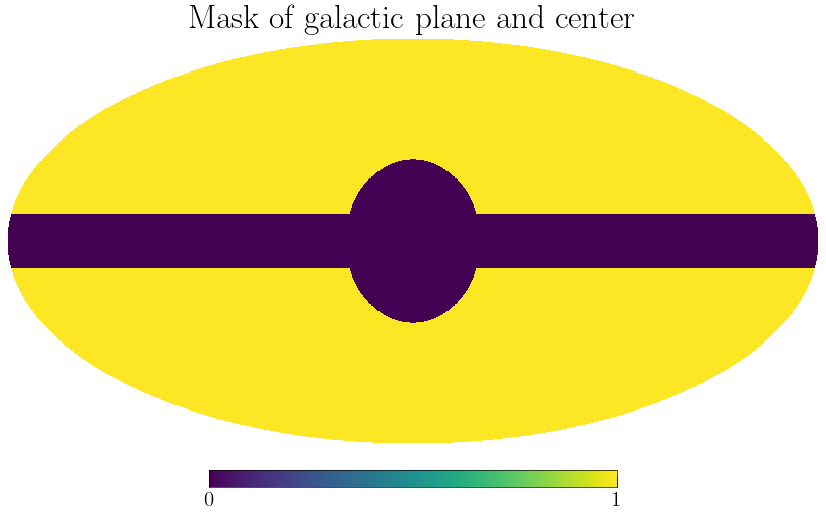

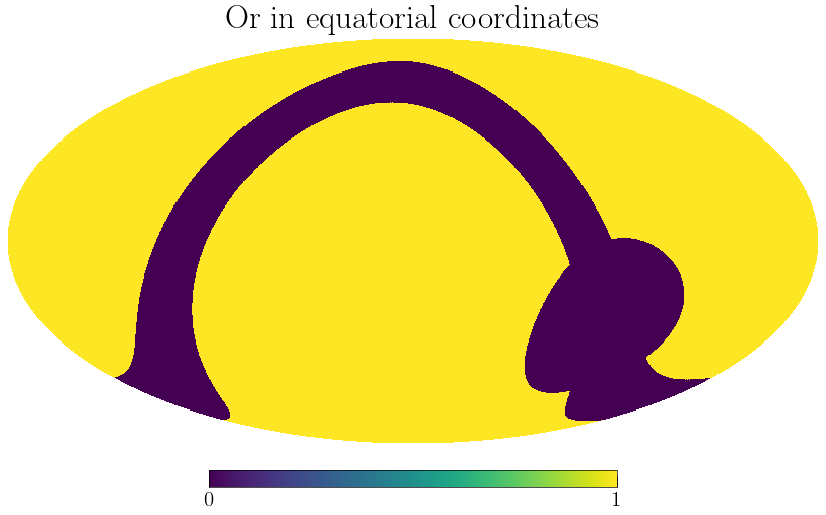

In [2]:
from SkyTools import masking

bcut = 10
galcenter_cut = 30

hp.mollview(masking.galactic_mask(1024, bcut, galcenter_cut), title='Mask of galactic plane and center')
eqmask = masking.galactic_mask(1024, bcut, galcenter_cut, galcoords=False)
hp.mollview(eqmask, title='Or in equatorial coordinates')

In [3]:
from SkyTools import random_catalogs

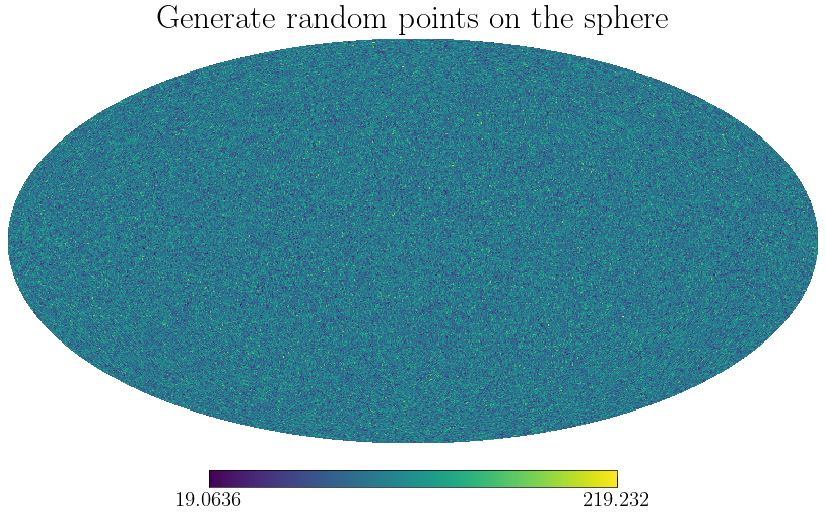

In [4]:
# generate points uniformly on the sphere, with mean density of 100/deg^2
ra, dec = random_catalogs.uniform_sphere(100, density=True)
t = Table()
t['RA'] = ra
t['DEC'] = dec
hp.mollview(myhp.healpix_density_map(t, nsides=128, deg2=True), title='Generate random points on the sphere')

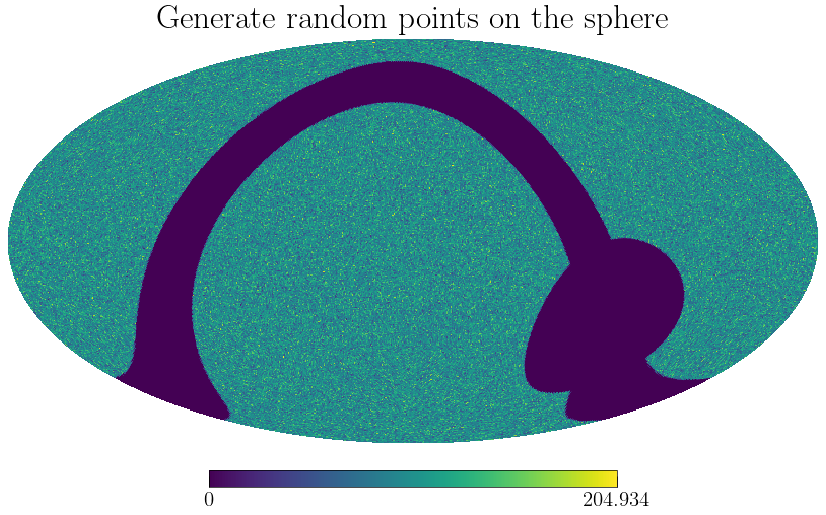

In [5]:
t = myhp.cat_in_mask(t, eqmask)
hp.mollview(myhp.healpix_density_map(t, nsides=128, deg2=True), title='Generate random points on the sphere')